# Отбор признаков

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## 0. Данные

Источник: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11258,19546.0,-0.454749,-4.054983,-0.273254,-0.399568,-2.590132,-0.393092,0.138466,-0.391686,-0.873562,...,0.054097,-1.563757,-0.628145,0.457243,-0.338810,-0.653193,-0.184372,0.185015,1002.00,0
78321,57475.0,-6.423197,1.072629,-3.820238,-0.269845,-4.125205,-0.690805,-0.196968,2.840871,-0.307457,...,0.011082,0.109586,-0.041425,0.576822,-0.291755,0.837947,-0.077805,-0.788987,255.30,0
226814,144808.0,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,667.55,1
276476,167121.0,-0.454736,0.189683,0.839674,-0.810172,0.458127,0.106038,0.427228,0.195571,-1.232442,...,-0.136466,0.090678,-0.255906,0.628284,0.175469,-0.617653,0.147898,0.142017,9.94,0
174521,121948.0,0.014204,0.516012,0.248349,-0.307436,0.180279,1.025058,-0.806851,-1.255250,0.843365,...,1.673448,0.206028,-0.294641,0.199466,0.902569,0.829324,0.220143,0.262698,7.50,0


**Задание** Давайте проверим, сколько "фрода" в этой выборке?

In [4]:
data['Class'].value_counts()

0    28432
1      492
Name: Class, dtype: int64

## 1. Поиск константных признаков

**Задание** Посчитайте стандартное отклонение признаков

In [5]:
data.drop('Class', axis=1).std()

Time      47526.033582
V1            2.173112
V2            1.697883
V3            1.935877
V4            1.546847
V5            1.556783
V6            1.348886
V7            1.649011
V8            1.431676
V9            1.170255
V10           1.416028
V11           1.162310
V12           1.379552
V13           0.998768
V14           1.382527
V15           0.912255
V16           1.114398
V17           1.457098
V18           0.944466
V19           0.828933
V20           0.748010
V21           0.862053
V22           0.742108
V23           0.565251
V24           0.605248
V25           0.520625
V26           0.481248
V27           0.434112
V28           0.345710
Amount      235.492046
dtype: float64

## 2. Поиск коррелирующих признаков

**Задание**: составьте матрицу корреляций и визуализируйте ее. 
Проанализируйте, есть ли необходимость в удалении каких-либо признаков

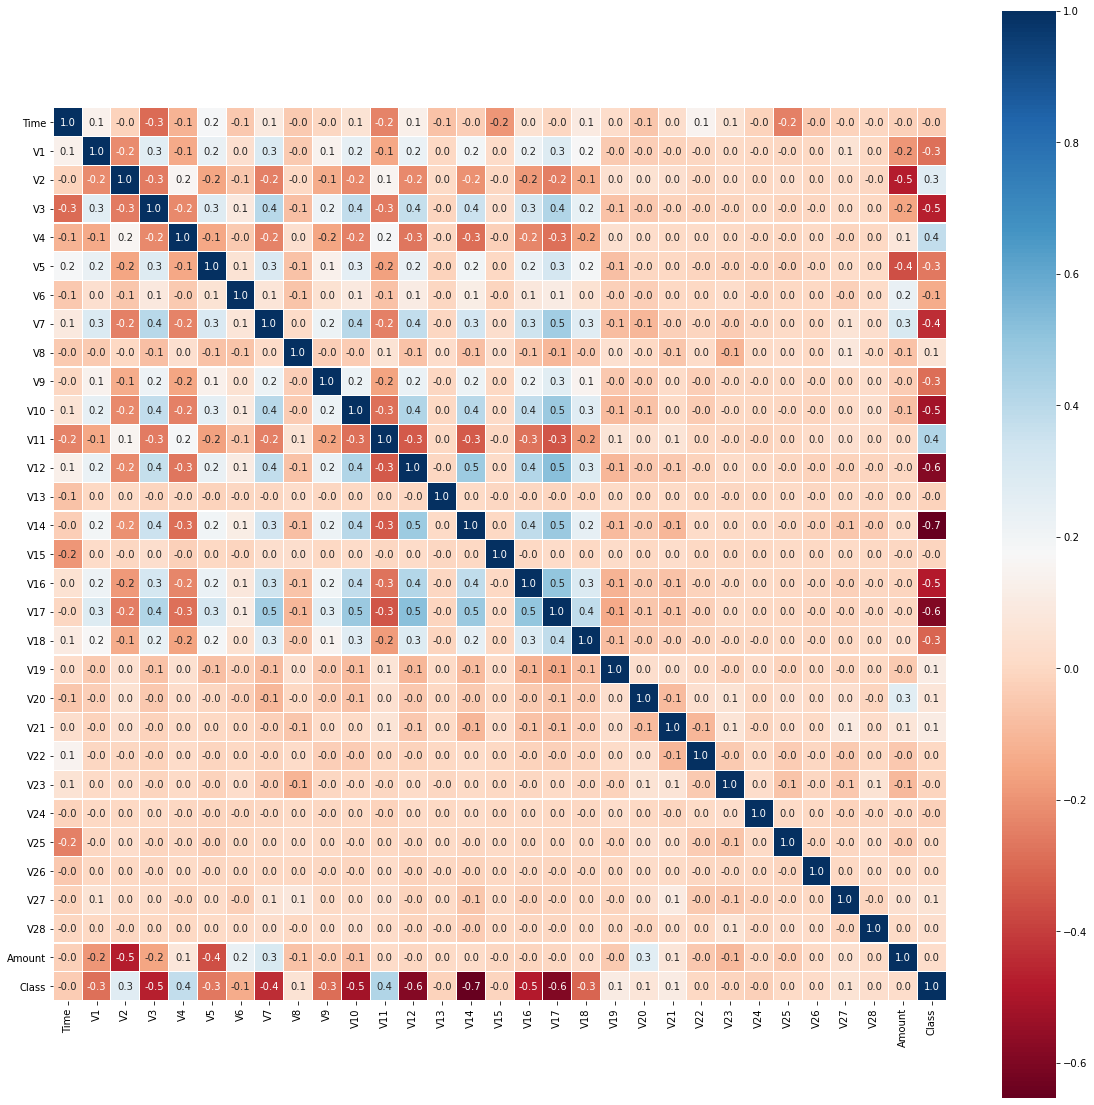

In [6]:
plt.figure(figsize=(20,20))
corr = data.corr()
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

## 3. Оценка T-score

In [7]:
def get_t_score(column, target):
    data_ones = column[target == 1]
    data_zeros = column[target == 0]
    mean_dif = np.abs(data_ones.mean() - data_zeros.mean())
    stde_ones = data_ones.var() / data_ones.shape[0]
    stde_zeros = data_zeros.var() / data_zeros.shape[0]
    stre_total = (stde_ones + stde_zeros) ** (1 / 2)
    t_score = mean_dif / stre_total
    return t_score

**Задание**: Рассчитайте t_scores для всех признаков

In [8]:
t_scores = [get_t_score(data[column], data['Class']) for column in data.drop('Class', axis=1).columns]


**Задание**: визуализируйте важность признаков в виде столбцовой диаграммы

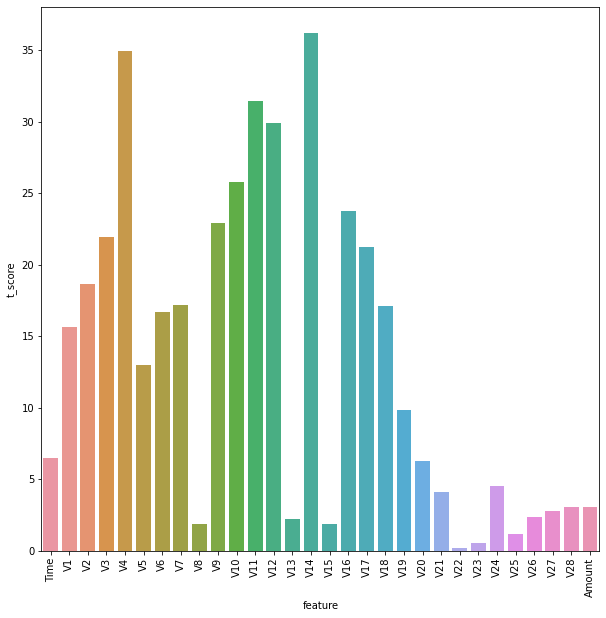

In [41]:
features = list(data.drop('Class', axis=1).columns)
df_coef = pd.DataFrame(t_scores, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(30, 10));

**Задание**: составьте список отфильтрованных признаков. Соберите в небольшую функцию eliminate_features с двумя аргументами: 
- features
- eliminated_features

Сохраните результат в переменной features_list_tscore

In [45]:
def eliminate_features(features, eliminated_features):
    return list(set(features) - set(eliminated_features))

In [46]:
features = list(data.drop('Class', axis=1).columns)
features_list_tscore = eliminate_features(features, ['V22', 'V23', 'V25'])

## 4. Отбор с помощью моделей

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

**Задание**: устроим здесь train_test_split со стратификацией по целевой переменной

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1),
                                                    data['Class'],
                                                    stratify=data['Class'])

In [68]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test_scaled =  pd.DataFrame(scaler.transform(X_test), columns=features)

### Отбор с помощью линейных моделей

**Задание**: Обучим логистическую регрессию с аргументами 
- penalty='l1'
- solver='liblinear'

In [69]:
model_lr = LogisticRegression(penalty='l1', solver='liblinear')
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

**Задание**: визуализируйте важность признаков в виде столбцовой диаграммы

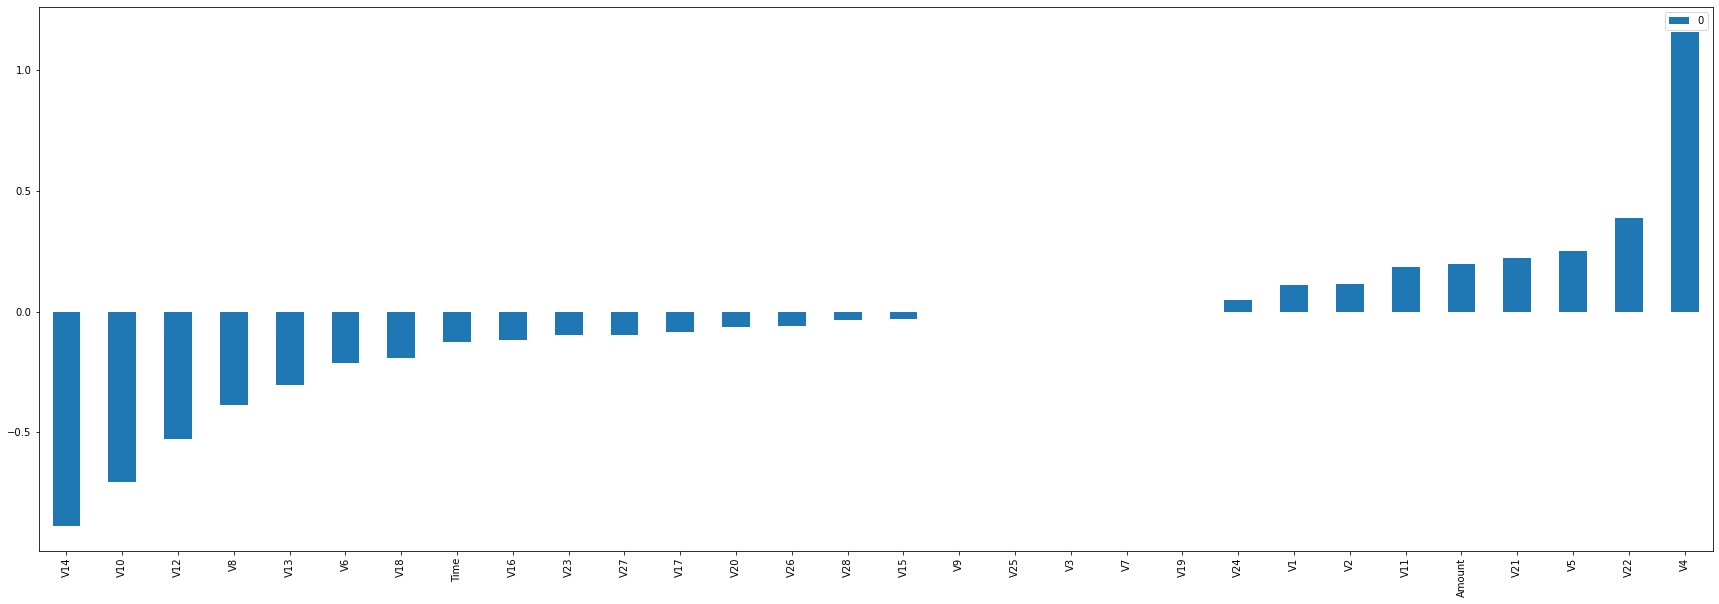

In [70]:
coefs = model_lr.coef_[0]

features = list(data.drop('Class', axis=1).columns)
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(30, 10));

**Задание**: составьте список самых важных фичей по версии логистической регрессии features_list_lr

In [71]:
features_list_lr = eliminate_features(features, ['V9', 'V25', 'V3', 'V7', 'V19'])

### Отбор случайным лесом

**Задание**: Обучим случайный лес

In [72]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

**Задание**: визуализируйте важность признаков в виде столбцовой диаграммы

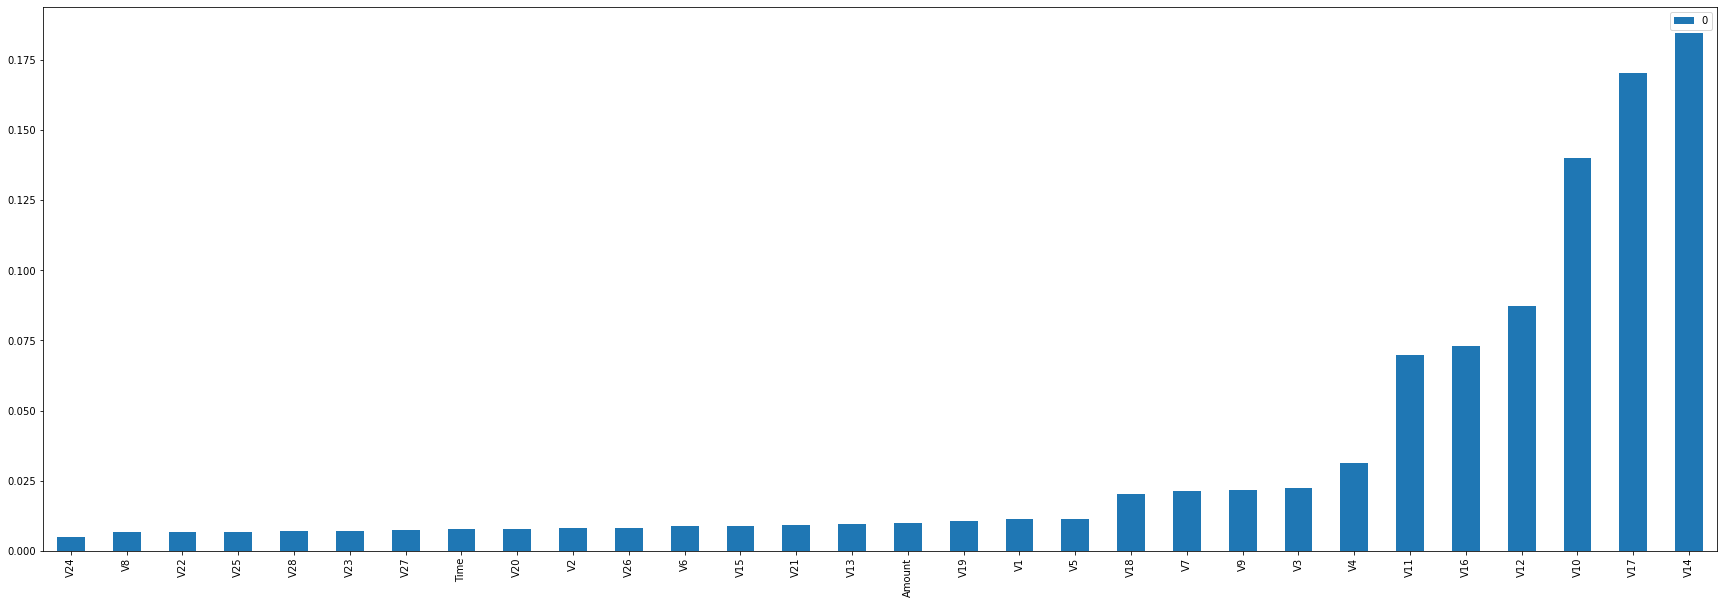

In [73]:
coefs = model_rf.feature_importances_

features = list(data.drop('Class', axis=1).columns)
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(30, 10));

**Задание**: составьте список самых важных фичей по версии случайного лесе features_list_rf

In [74]:
features_list_rf = eliminate_features(features, ['V24', 'V22', 'V23', 'V28', 'V25', 'V20'])

## 5. Будем учить на разных группах признаков

**Задание**: давайте соберем функцию для обучения. Подадим ей:
- model
- X_train
- X_test
- y_train
- y_test
- features: набор признаков для обучения
<br> 
В ответ она нам вернет: модель и значение roc_auc

In [118]:
def train_model(model, X_train, X_test, y_train, y_test, features):
    model.fit(X_train[features], y_train)
    y_pred = model.predict_proba(X_test[features])
    roc_auc = roc_auc_score(y_test, y_pred[:, 1])
    return model, roc_auc

In [119]:
for features_list in [features, features_list_tscore, features_list_lr, features_list_rf]:
    model, roc_auc = train_model(LogisticRegression(), 
                                 X_train_scaled, 
                                 X_test_scaled, 
                                 y_train, y_test,
                                 features_list)
    print(roc_auc)

0.9823283967223465
0.9843540542889953
0.9829906529228488
0.9828785611997932


In [121]:
for features_list in [features, features_list_tscore, features_list_lr, features_list_rf]:
    model, roc_auc = train_model(RandomForestClassifier(), 
                                 X_train_scaled, 
                                 X_test_scaled, 
                                 y_train, y_test,
                                 features_list)
    print(roc_auc)

0.9620666739869426
0.9743207012824209
0.9695848259833189
0.9615914279570483


## 6. t-SNE

- Cтохастическое вложение соседей с t-распределением (t-SNE)
- Метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве.

<img src='https://miro.medium.com/max/4800/0*8t35MPHpbvy9WwDY'>

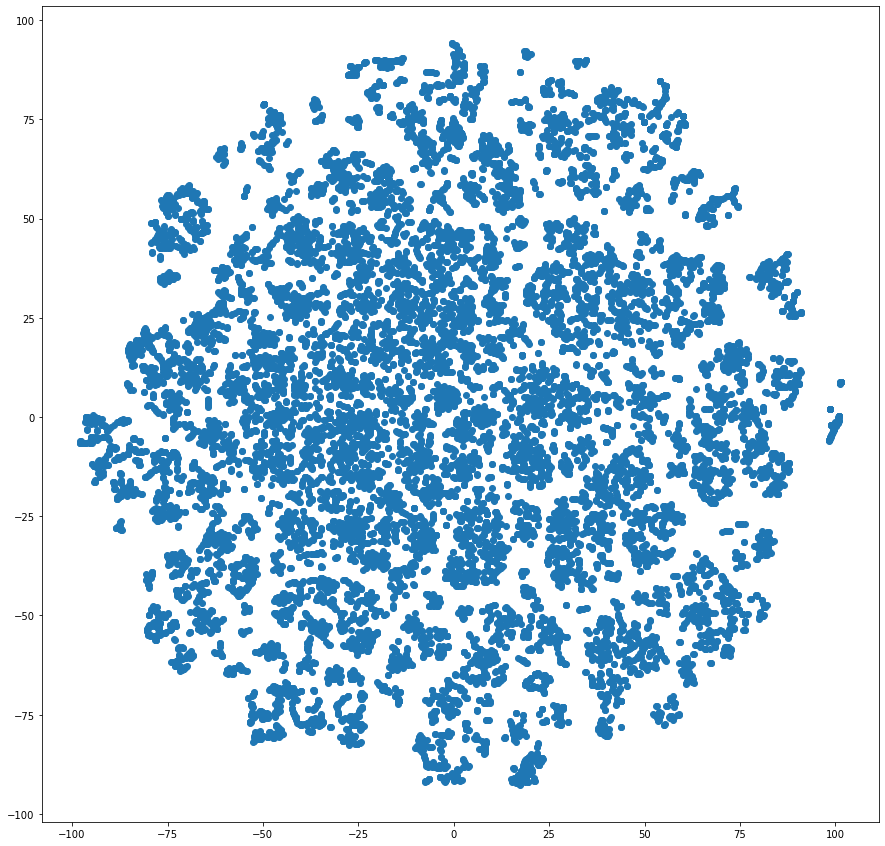

In [167]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17, perplexity=15, n_jobs=-1)
tsne_representation = tsne.fit_transform(X_train_scaled)
plt.figure(figsize=(15, 15))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

**Задание**: обучим kmeans на обучающей выборке и посмотрим распределение кластеров на tsne-трансформации

In [137]:
from sklearn.cluster import KMeans

In [164]:
k_means = KMeans(n_clusters = 5)
k_means = k_means.fit(X_train_scaled)

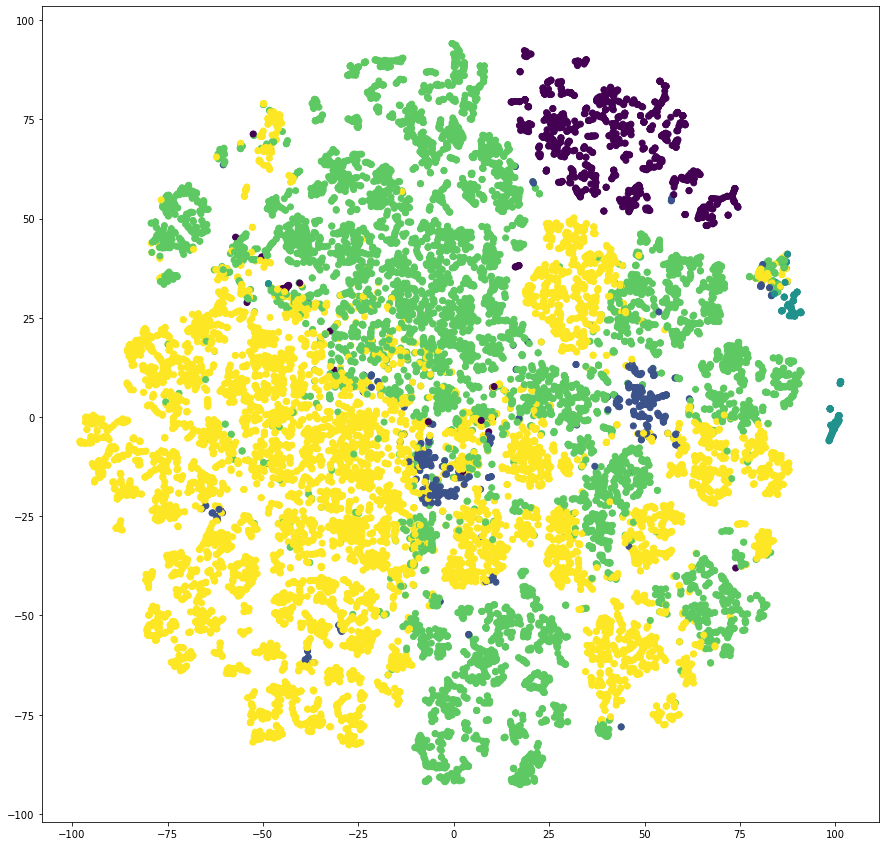

In [165]:
plt.figure(figsize=(15, 15))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=k_means.labels_)

## 7. PCA

In [152]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_scaled)

In [161]:
pca.explained_variance_ratio_

array([0.1538892 , 0.05718042])

<AxesSubplot:>

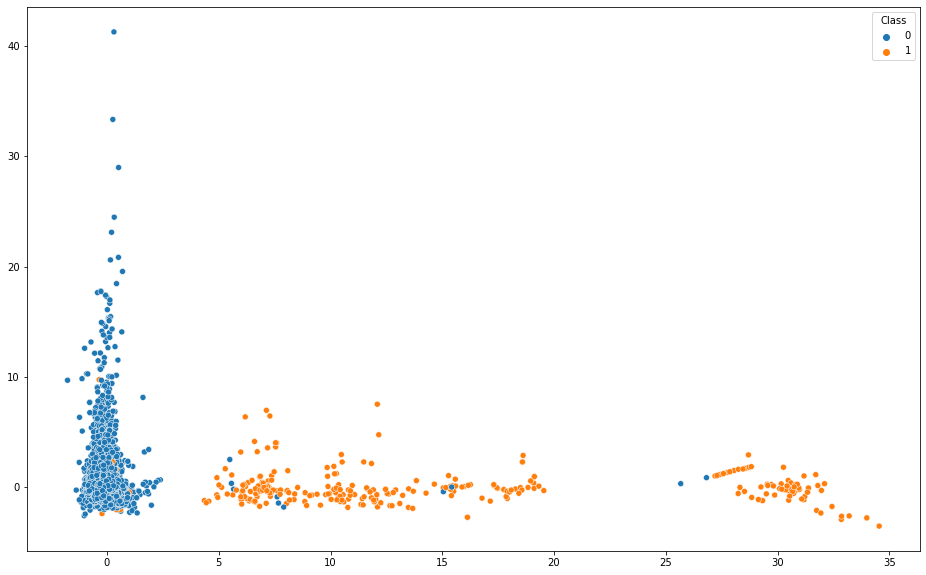

In [156]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=y_train)

<AxesSubplot:>

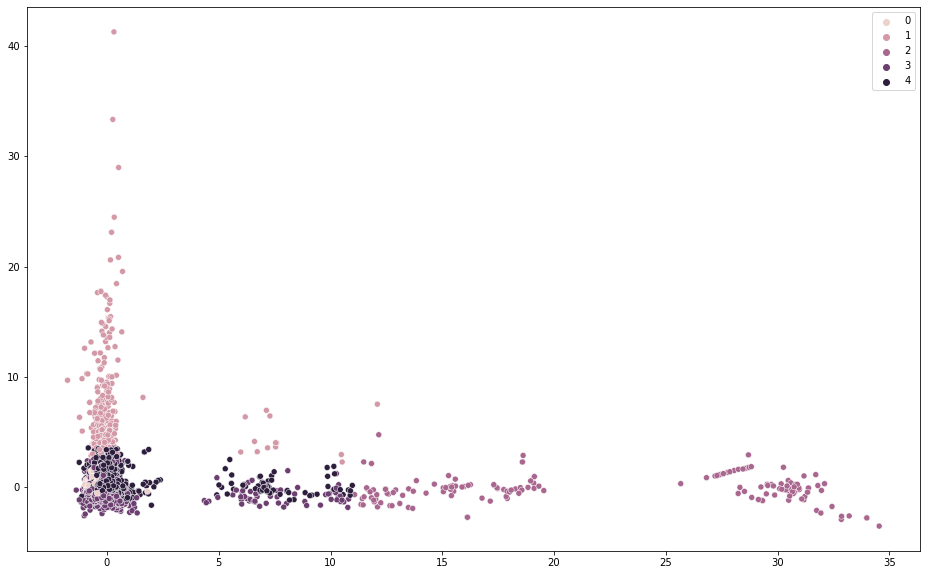

In [166]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=k_means.labels_)